# Lecture 12: Decay into a squeezed vacuum field

Author: J. R. Johansson (robert@riken.jp), http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *

## Introduction

We follow *The theory of open quantum systems*, by Breuer and Pretruccione, section 3.4.3 - 3.4.4, which gives the master equation for a two-level system that decays into an environment that is in a squeezed vacuum state:

$\frac{d}{dt}\rho = \gamma_0(N+1)\left(\sigma_-\rho(t)\sigma_+ - \frac{1}{2}\sigma_+\sigma_-\rho(t) - \frac{1}{2}\rho(t)\sigma_+\sigma_-\right)$

$ + \gamma_0 N \left(\sigma_+\rho(t)\sigma_- - \frac{1}{2}\sigma_-\sigma_+\rho(t) - \frac{1}{2}\rho(t)\sigma_-\sigma_+\right)$

$ -\gamma_0 M \sigma_+\rho(t)\sigma_+ -\gamma_0 M^* \sigma_-\rho(t)\sigma_-$

where the parameters $N$ and $M$ describes the temperature and squeezing of the environmental modes:

$\displaystyle N = N_{\rm th} ({\cosh}^2 r + {\sinh}^2 r) + \sinh^2 r$

$\displaystyle M = - \cosh r \sinh r e^{i\theta} (2 N_{\rm th} + 1)$

Alternatively, this master equation can be written in standard Lindblad form,

$\frac{d}{dt}\rho = \gamma_0\left(C\rho(t)C^\dagger - \frac{1}{2}C^\dagger C\rho(t) - \frac{1}{2}\rho(t)C^\dagger C\right)$

where $C = \sigma_-\cosh r + \sigma_+ \sinh r e^{i\theta}$.

Below we will solve these master equations numerically using QuTiP, and visualize at the resulting dynamics.


### Problem parameters

In [5]:
w0 = 1.0 * 2 * np.pi
gamma0 = 0.05

In [6]:
# the temperature of the environment in frequency units
w_th = 0.0 * 2 * np.pi

In [7]:
# the number of average excitations in the environment mode w0 at temperture w_th
Nth = n_thermal(w0, w_th)

Nth

0.0

#### Parameters that describes the squeezing of the bath

In [9]:
# squeezing parameter for the environment
r = 1.0
theta = 0.1 * np.pi

In [13]:
N = Nth * (np.cosh(r) ** 2 + np.sinh(r) ** 2) + np.sinh(r) ** 2

N

1.3810978455418155

In [15]:
M = - np.cosh(r) * np.sinh(r) * np.exp(-1j * theta) * (2 * Nth + 1)

M

(-1.7246746122879026+0.56038075112519081j)

In [16]:
# Check, should be zero according to Eq. 3.261 in Breuer and Petruccione
abs(M)**2 - (N * (N + 1) - Nth * (Nth + 1))

0.0

### Operators, Hamiltonian and initial state

In [17]:
sm = sigmam()
sp = sigmap()

In [18]:
H = - 0.5 * w0 * sigmaz()  # by adding the hamiltonian here, so we move back to the schrodinger picture

In [21]:
c_ops = [np.sqrt(gamma0 * (N + 1)) * sm, np.sqrt(gamma0 * N) * sp]

Let's first construct the standard part of the Liouvillian, corresponding the unitary contribution and the first two terms in the first master equation given above:

In [22]:
L0 = liouvillian(H, c_ops)

L0

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = [4, 4], type = super, isherm = False
Qobj data =
[[-0.11905489+0.j          0.00000000+0.j          0.00000000+0.j
   0.06905489+0.j        ]
 [ 0.00000000+0.j         -0.09405489-6.28318531j  0.00000000+0.j
   0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j         -0.09405489+6.28318531j
   0.00000000+0.j        ]
 [ 0.11905489+0.j          0.00000000+0.j          0.00000000+0.j
  -0.06905489+0.j        ]]

Next we manually construct the Liouvillian for the effect of the squeeing in the environment, which is not on standard form we can therefore not use the `liouvillian` function in QuTiP

In [24]:
Lsq = - gamma0 * M * spre(sp) * spost(sp) - gamma0 * np.conjugate(M) * spre(sm) * spost(sm)

Lsq

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = [4, 4], type = super, isherm = True
Qobj data =
[[ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.08623373+0.02801904j
   0.00000000+0.j        ]
 [ 0.00000000+0.j          0.08623373-0.02801904j  0.00000000+0.j
   0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j        ]]

The total Liouvillian for the master equation is now

In [25]:
L = L0 + Lsq

L

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = [4, 4], type = super, isherm = False
Qobj data =
[[-0.11905489+0.j          0.00000000+0.j          0.00000000+0.j
   0.06905489+0.j        ]
 [ 0.00000000+0.j         -0.09405489-6.28318531j  0.08623373+0.02801904j
   0.00000000+0.j        ]
 [ 0.00000000+0.j          0.08623373-0.02801904j -0.09405489+6.28318531j
   0.00000000+0.j        ]
 [ 0.11905489+0.j          0.00000000+0.j          0.00000000+0.j
  -0.06905489+0.j        ]]

### Evolution

We can now solve the master equation numerically using QuTiP's `mesolve` function:

In [26]:
tlist = np.linspace(0, 50, 1000)

In [27]:
# start in the qubit superposition state
psi0 = (2j * basis(2, 0) + 1 * basis(2, 1)).unit()

In [28]:
e_ops = [sigmax(), sigmay(), sigmaz()]

In [29]:
result1 = mesolve(L, psi0, tlist, [], e_ops)

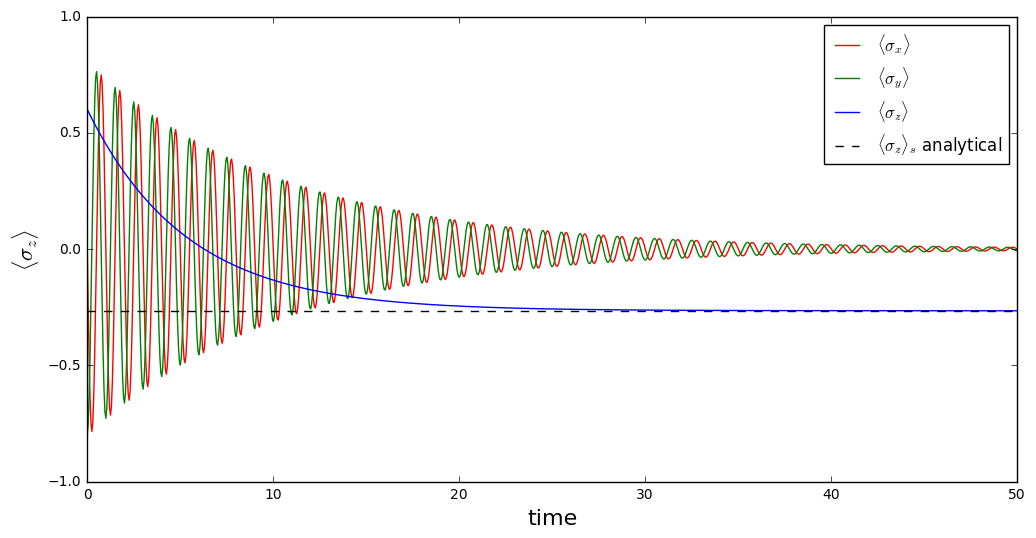

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(result1.times, result1.expect[0], 'r', label=r'$\langle\sigma_x\rangle$')
ax.plot(result1.times, result1.expect[1], 'g', label=r'$\langle\sigma_y\rangle$')
ax.plot(result1.times, result1.expect[2], 'b', label=r'$\langle\sigma_z\rangle$')

sz_ss_analytical = - 1 / (2 * N + 1)
ax.plot(result1.times, sz_ss_analytical * np.ones(shape(result1.times)), 'k--', 
        label=r'$\langle\sigma_z\rangle_s$ analytical')


ax.set_ylabel(r'$\langle\sigma_z\rangle$', fontsize=16)
ax.set_xlabel("time", fontsize=16)
ax.legend()
ax.set_ylim(-1, 1);

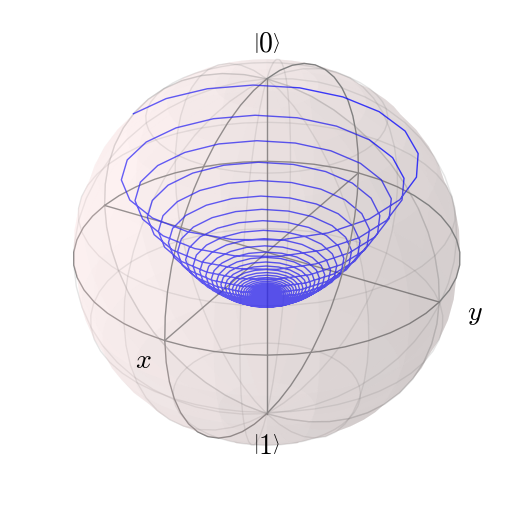

In [31]:
b = Bloch()
b.add_points(result1.expect, meth='l')
b.show()

### Alternative master equation on Lindblad form

We can solve the alternative master equation, which is on the standard Lindblad form, directly using the QuTiP `mesolve` function:

In [33]:
c_ops = [np.sqrt(gamma0) * (sm * np.cosh(r) + sp * np.sinh(r) * np.exp(1j*theta))]

In [34]:
result2 = mesolve(H, psi0, tlist, c_ops, e_ops)

And we can verify that it indeed gives the same results:

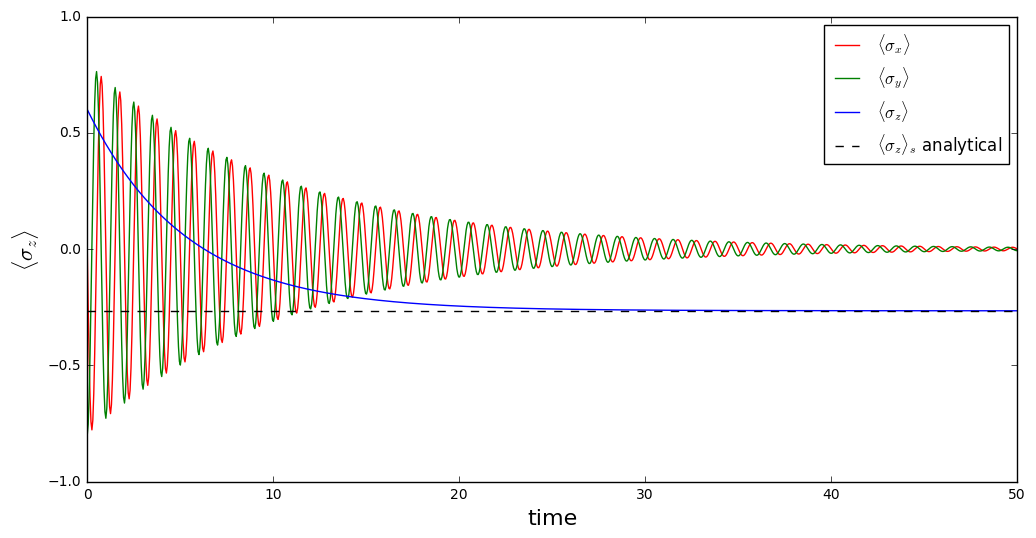

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(result2.times, result2.expect[0], 'r', label=r'$\langle\sigma_x\rangle$')
ax.plot(result2.times, result2.expect[1], 'g', label=r'$\langle\sigma_y\rangle$')
ax.plot(result2.times, result2.expect[2], 'b', label=r'$\langle\sigma_z\rangle$')

sz_ss_analytical = - 1 / (2 * N + 1)
ax.plot(result2.times, sz_ss_analytical * np.ones(shape(result2.times)), 'k--', 
        label=r'$\langle\sigma_z\rangle_s$ analytical')


ax.set_ylabel(r'$\langle\sigma_z\rangle$', fontsize=16)
ax.set_xlabel("time", fontsize=16)
ax.legend()
ax.set_ylim(-1, 1);

### Compare the two forms of master equations

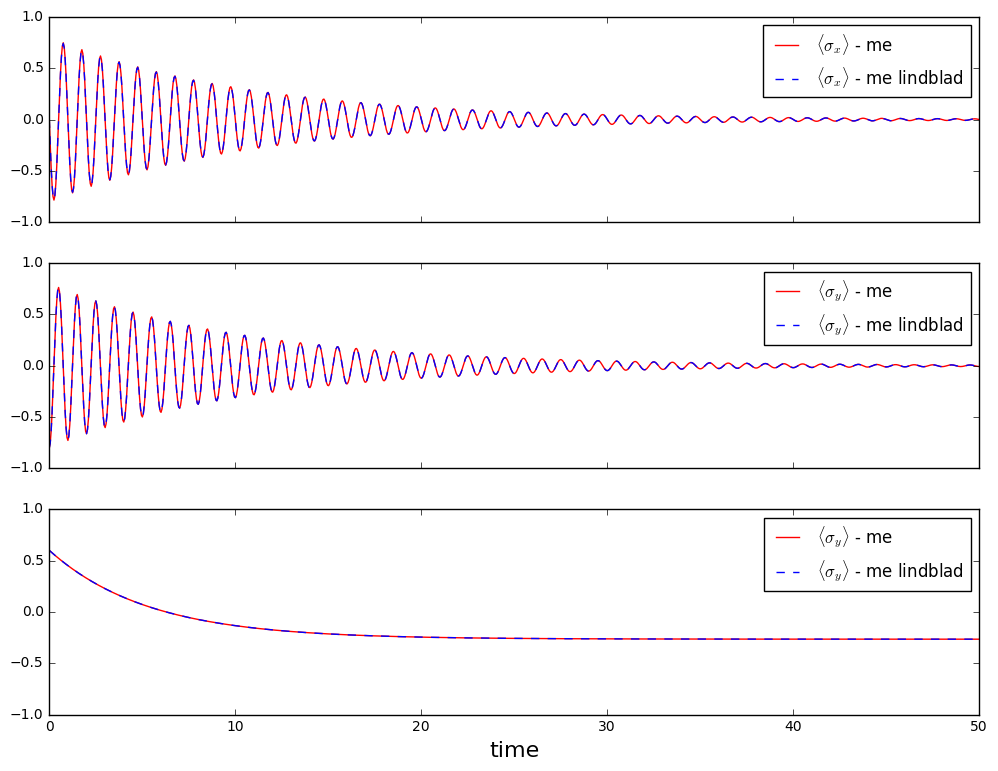

In [36]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 9))

axes[0].plot(result1.times, result1.expect[0], 'r', label=r'$\langle\sigma_x\rangle$ - me')
axes[0].plot(result2.times, result2.expect[0], 'b--', label=r'$\langle\sigma_x\rangle$ - me lindblad')
axes[0].legend()
axes[0].set_ylim(-1, 1);

axes[1].plot(result1.times, result1.expect[1], 'r', label=r'$\langle\sigma_y\rangle$ - me')
axes[1].plot(result2.times, result2.expect[1], 'b--', label=r'$\langle\sigma_y\rangle$ - me lindblad')
axes[1].legend()
axes[1].set_ylim(-1, 1);

axes[2].plot(result1.times, result1.expect[2], 'r', label=r'$\langle\sigma_y\rangle$ - me')
axes[2].plot(result2.times, result2.expect[2], 'b--', label=r'$\langle\sigma_y\rangle$ - me lindblad')
axes[2].legend()
axes[2].set_ylim(-1, 1);
axes[2].set_xlabel("time", fontsize=16);

### Compare dissipation into vacuum and squeezed vacuum

In [29]:
# for vacuum: 
r = 0
theta = 0.0
c_ops = [sqrt(gamma0) * (sm * cosh(r) + sp * sinh(r) * exp(1j*theta))]

In [30]:
result1 = mesolve(H, psi0, tlist, c_ops, e_ops)

In [31]:
# for squeezed vacuum: 
r = 1.0
theta = 0.0
c_ops = [sqrt(gamma0) * (sm * cosh(r) + sp * sinh(r) * exp(1j*theta))]

In [32]:
result2 = mesolve(H, psi0, tlist, c_ops, e_ops)

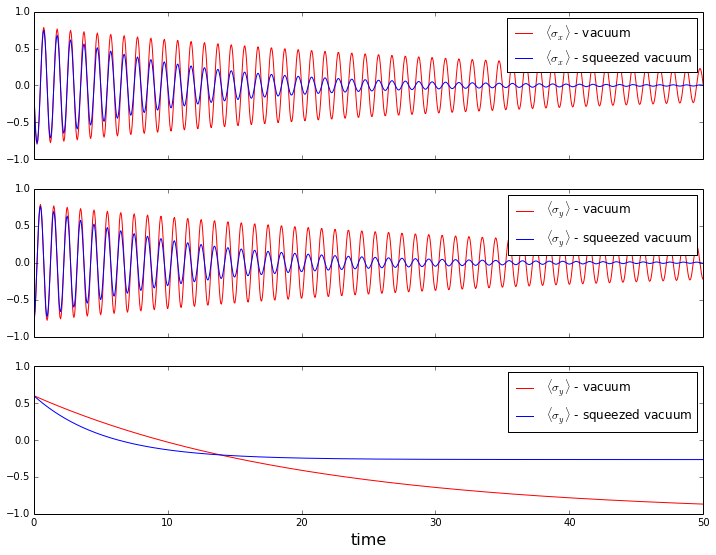

In [33]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 9))

axes[0].plot(result1.times, result1.expect[0], 'r', label=r'$\langle\sigma_x\rangle$ - vacuum')
axes[0].plot(result2.times, result2.expect[0], 'b', label=r'$\langle\sigma_x\rangle$ - squeezed vacuum')
axes[0].legend()
axes[0].set_ylim(-1, 1);

axes[1].plot(result1.times, result1.expect[1], 'r', label=r'$\langle\sigma_y\rangle$ - vacuum')
axes[1].plot(result2.times, result2.expect[1], 'b', label=r'$\langle\sigma_y\rangle$ - squeezed vacuum')
axes[1].legend()
axes[1].set_ylim(-1, 1);

axes[2].plot(result1.times, result1.expect[2], 'r', label=r'$\langle\sigma_y\rangle$ - vacuum')
axes[2].plot(result2.times, result2.expect[2], 'b', label=r'$\langle\sigma_y\rangle$ - squeezed vacuum')
axes[2].legend()
axes[2].set_ylim(-1, 1);
axes[2].set_xlabel("time", fontsize=16);

From this comparison it's clear that dissipation into a squeezed vacuum is faster than dissipation into vacuum.

### Software versions

In [34]:
from qutip.ipynbtools import version_table; version_table()